In [192]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

In [193]:
full_data = pd.read_stata('original_data/HCMST_ver_3.04.dta')

In [194]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4002 entries, 0 to 4001
Columns: 387 entries, caseid_new to w3_nonmbtiming_month
dtypes: category(325), float32(16), float64(39), int32(4), int8(2), object(1)
memory usage: 2.8+ MB


In [195]:
glb_data = full_data[full_data['glbstatus'] == 'glb']

In [196]:
intermediate_data_cleaning = glb_data[['HCMST_main_interview_yrmo', 'qflag', 'ppage', 'q9', 'respondent_yrsed', 'partner_yrsed', 'respondent_race', 'partner_race',
                       'pppartyid3', 'q12', 'papreligion', 'q7b',
                       'ppgender','q17c', 'q17d', 'ppwork', 'pphouse', 'pprent', 'ppmsacat', 'ppreg4',
                       'same_sex_couple', 'parental_approval', 'relationship_quality',
                       'married', 'civilnotreally', 'coresident', 'how_long_relationship',
                       'w2_broke_up', 'w3_broke_up',	
                       ]]

In [202]:
# rename q9 to partner age - already set to NaN for unpartnered individuals
# rename all weirdly named ones

intermediate_data_cleaning.rename(columns={'HCMST_main_interview_yrmo':'R_answer_date',
                           'qflag':'single_status',
                           'ppage': 'R_age',
                           'q9': 'P_age',
                           'respondent_yrsed': 'R_yrsed',
                           'partner_yrsed': 'P_yrsed',
                           'respondent_race': 'R_race',
                           'partner_race': 'P_race',
                           'pppartyid3' : 'R_political',
                           'q12': 'P_political',
                           'papreligion': 'R_religion',
                           'q7b': 'P_religion',
                           'ppgender':'R_gender',
                           'q17c': 'R_sexuality_women',
                           'q17d': 'R_sexuality_men',
                           'ppwork': 'R_work',
                           'pphouse': 'R_house',
                           'pprent': 'R_rent',
                           'ppmsacat': 'R_citydweller',
                           'ppreg4': 'R_region',
                           'married': 'married_start',
                           'civilnotreally': 'CU_DP_start',
                           'how_long_relationship': 'relationship_length_start'
                           }, inplace=True)






C:\Users\kvnpo\AppData\Local\Temp\ipykernel_15976\4006310091.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intermediate_data_cleaning.rename(columns={'HCMST_main_interview_yrmo':'R_answer_date',


In [203]:
intermediate_data_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Index: 955 entries, 0 to 3999
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   R_answer_date              955 non-null    float32 
 1   single_status              955 non-null    category
 2   R_age                      955 non-null    category
 3   P_age                      689 non-null    float64 
 4   R_yrsed                    955 non-null    float32 
 5   P_yrsed                    690 non-null    float32 
 6   R_race                     954 non-null    category
 7   P_race                     690 non-null    category
 8   R_political                955 non-null    category
 9   P_political                692 non-null    category
 10  R_religion                 954 non-null    category
 11  P_religion                 692 non-null    category
 12  R_gender                   955 non-null    category
 13  R_sexuality_women          361 non-null

<Axes: >

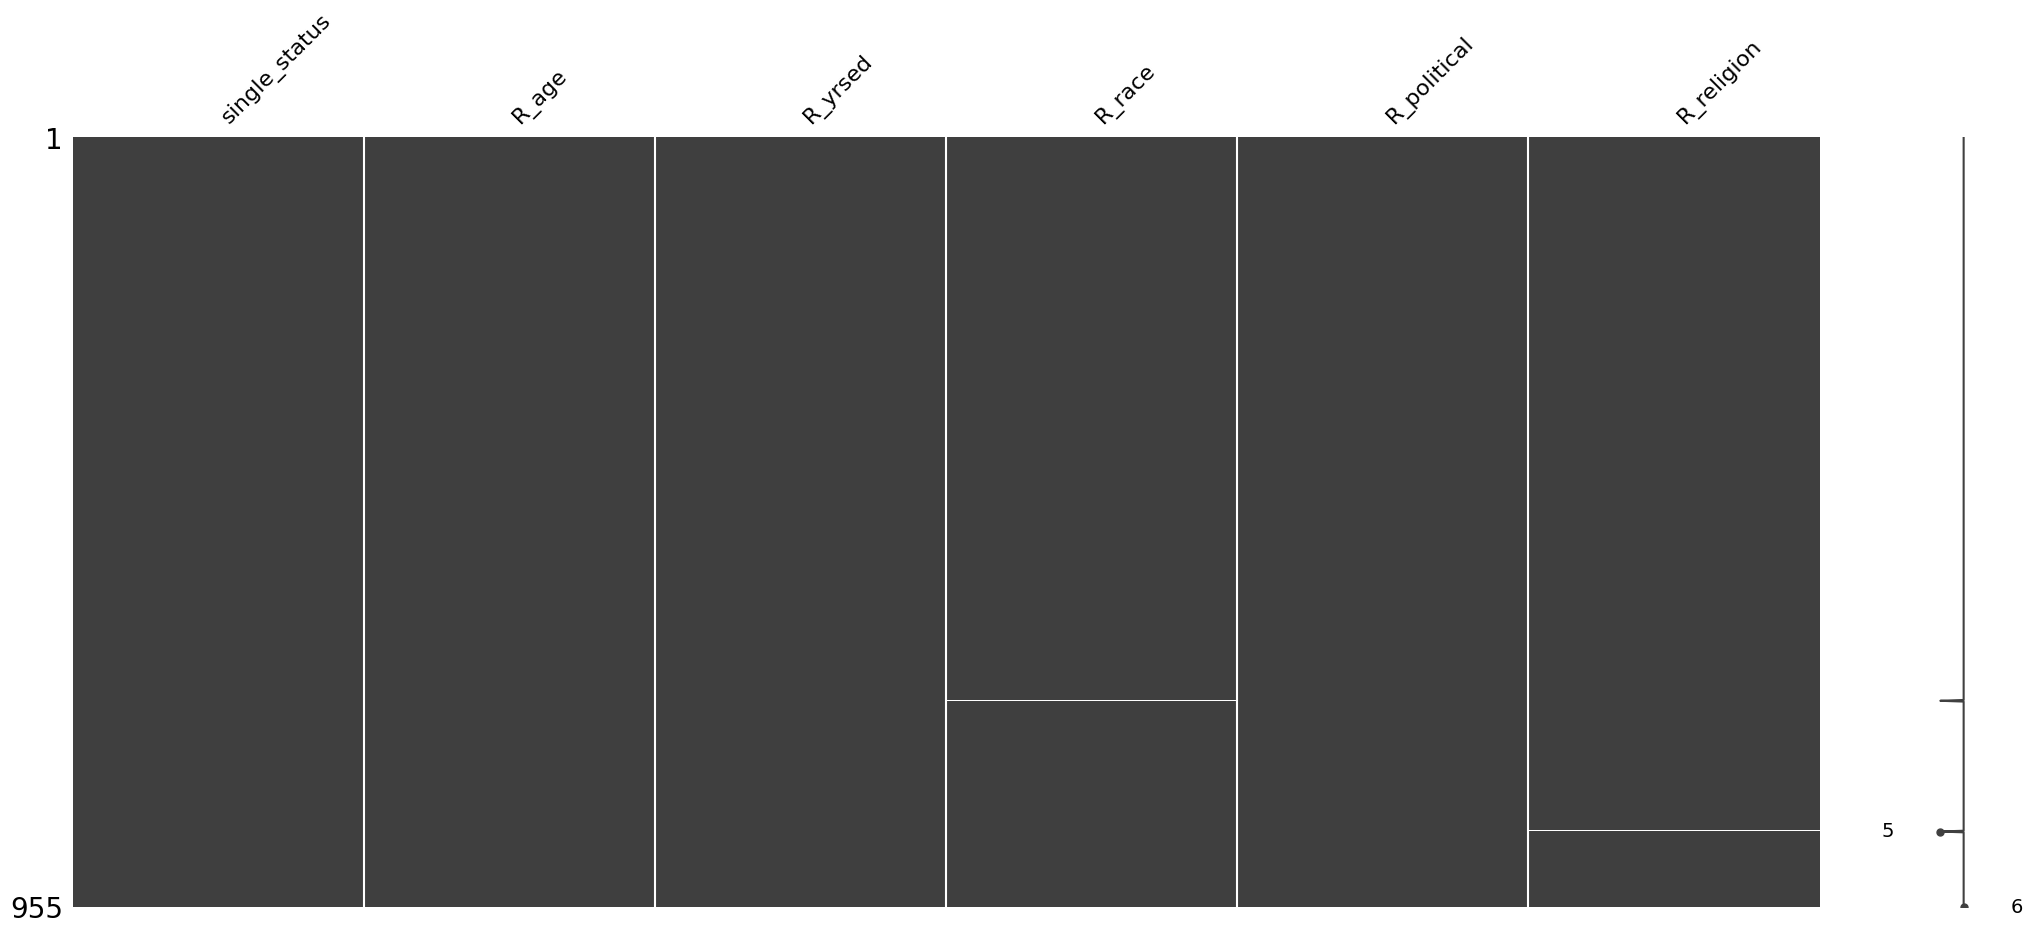

In [52]:
# Two variables for single - not single have 1 missing value ; visualise

missing_single_notsingle = intermediate_data_cleaning[['single_status', 'R_age', 'R_yrsed', 'R_race', 'R_political', 'R_religion']]

msno.matrix(missing_single_notsingle)

In [204]:
# Completely unrelated missing values ; impute mode 
# Could use better imputation method like KNN, inferring from other variables, but time constraint

mode_r_race = intermediate_data_cleaning['R_race'].mode()[0]
mode_r_religion = intermediate_data_cleaning['R_religion'].mode()[0]

intermediate_data_cleaning.loc[(intermediate_data_cleaning['R_race'].isna()),'R_race'] = mode_r_race
intermediate_data_cleaning.loc[(intermediate_data_cleaning['R_religion'].isna()),'R_religion'] = mode_r_religion

In [54]:
# 692 partnered - 263 single
# missing values in partner age, race (3) and education (2)
intermediate_data_cleaning[intermediate_data_cleaning['single_status'] == 'partnered'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 692 entries, 0 to 3999
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   R_answer_date              692 non-null    float32 
 1   single_status              692 non-null    category
 2   R_age                      692 non-null    category
 3   P_age                      689 non-null    float64 
 4   R_yrsed                    692 non-null    float32 
 5   P_yrsed                    690 non-null    float32 
 6   R_race                     692 non-null    category
 7   P_race                     689 non-null    category
 8   R_political                692 non-null    category
 9   P_political                692 non-null    category
 10  R_religion                 692 non-null    category
 11  P_religion                 692 non-null    category
 12  R_gender                   692 non-null    category
 13  R_sexuality_women          361 non-null

In [55]:
# Missing values in parental_approval (181), relationship quality (2), coresident (1)
# relationship_length_start (1)
intermediate_data_cleaning[['same_sex_couple', 'parental_approval',
       'relationship_quality', 'married_start', 'CU_DP_start', 'coresident',
       'relationship_length_start', 'w3_divorce_month', 'w3_divorce_year',
       'w3_breakup_month', 'w3_breakup_year', 'w2_q3', 'w3_q3', 'w2_q9',
       'w3_q9']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 955 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   same_sex_couple            692 non-null    category
 1   parental_approval          511 non-null    category
 2   relationship_quality       690 non-null    category
 3   married_start              955 non-null    category
 4   CU_DP_start                111 non-null    category
 5   coresident                 691 non-null    category
 6   relationship_length_start  690 non-null    float32 
 7   w3_divorce_month           2 non-null      category
 8   w3_divorce_year            2 non-null      category
 9   w3_breakup_month           26 non-null     category
 10  w3_breakup_year            26 non-null     category
 11  w2_q3                      9 non-null      category
 12  w3_q3                      4 non-null      category
 13  w2_q9                      87 non-null 

<Axes: >

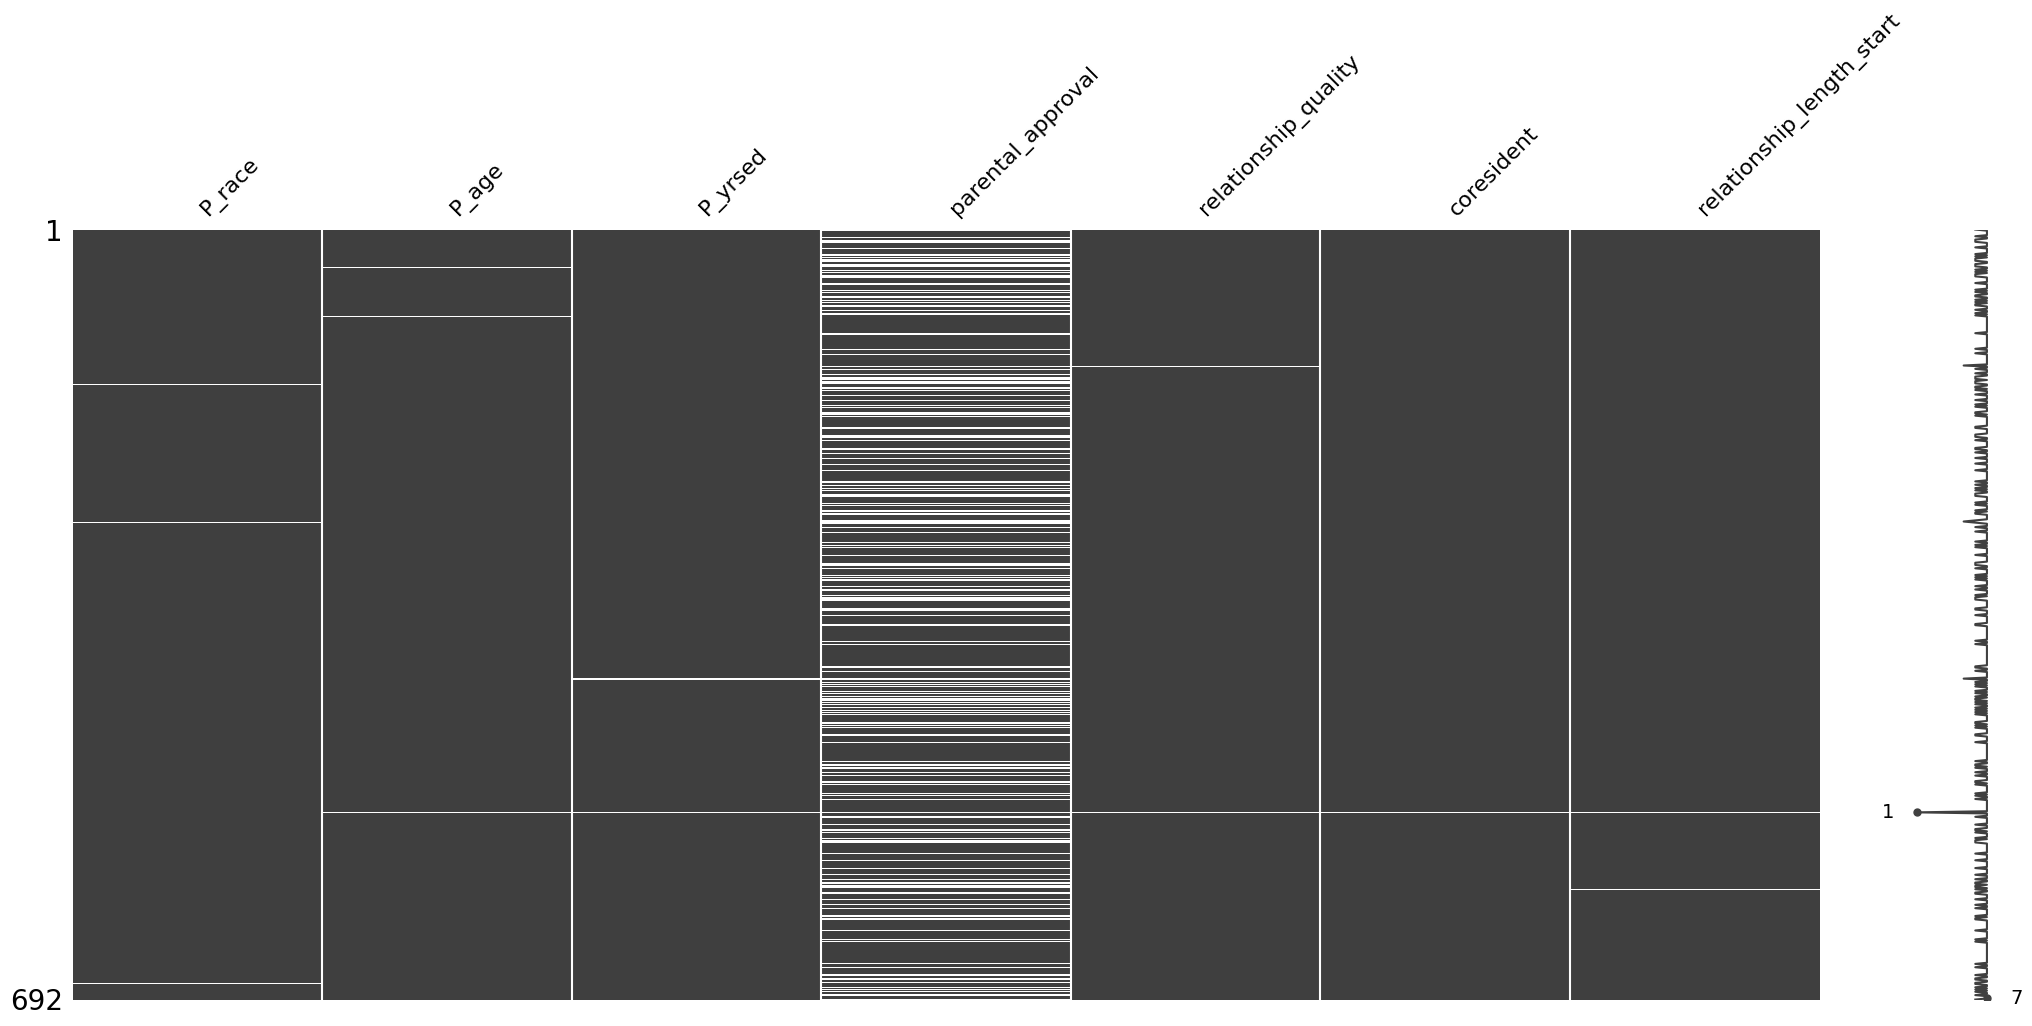

In [56]:
# view missing values 

partnered_missing_data = intermediate_data_cleaning[intermediate_data_cleaning['single_status'] == 'partnered'][['P_race', 
                                                                                                                'P_age', 
                                                                                                                'P_yrsed', 
                                                                                                                'parental_approval',
                                                                                                                'relationship_quality',
                                                                                                                'coresident',
                                                                                                                'relationship_length_start']]

msno.matrix(partnered_missing_data)

In [205]:
# Drop parental approval column for this analysis ; too many missing values
# Drop row with multiple missing values

intermediate_data_cleaning = intermediate_data_cleaning.drop(columns=['parental_approval'])

intermediate_data_cleaning = intermediate_data_cleaning.drop(
    intermediate_data_cleaning[
        (intermediate_data_cleaning['single_status'] == 'partnered') &
        (intermediate_data_cleaning['P_age'].isna()) &
        (intermediate_data_cleaning['P_yrsed'].isna()) &
        (intermediate_data_cleaning['relationship_quality'].isna()) &
        (intermediate_data_cleaning['coresident'].isna()) &
        (intermediate_data_cleaning['relationship_length_start'].isna())
    ].index
)


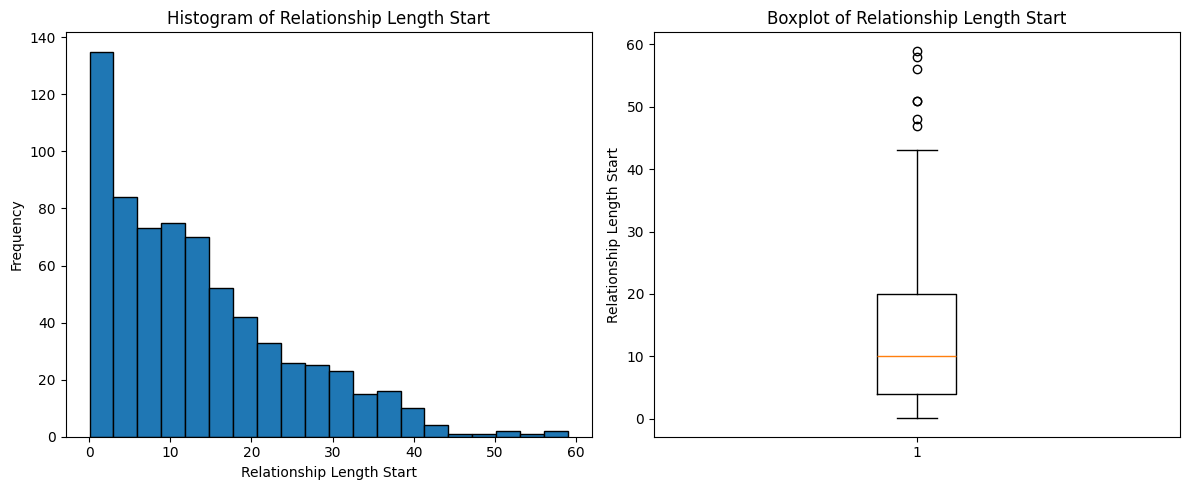

In [72]:
# Check distribution of relationship length start - numeric variable
# Decide if mean, median or mode imputation
# From histogram, not even skewed distribution, most couples are new
# -> impute mode

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
axes[0].hist(intermediate_data_cleaning['relationship_length_start'].dropna(), bins=20, edgecolor='black')
axes[0].set_title('Histogram of Relationship Length Start')
axes[0].set_xlabel('Relationship Length Start')
axes[0].set_ylabel('Frequency')

# Boxplot
axes[1].boxplot(intermediate_data_cleaning['relationship_length_start'].dropna(), vert=True)
axes[1].set_title('Boxplot of Relationship Length Start')
axes[1].set_ylabel('Relationship Length Start')

# Show plots
plt.tight_layout()
plt.show()

In [206]:
# Impute rest with mode

mode_p_race = intermediate_data_cleaning['P_race'].mode()[0]
mode_p_age = intermediate_data_cleaning['P_age'].mode()[0]
mode_p_yrsed = intermediate_data_cleaning['P_yrsed'].mode()[0]
mode_relationshipquality = intermediate_data_cleaning['relationship_quality'].mode()[0]
mode_relationshiplengthstart = intermediate_data_cleaning['relationship_length_start'].mode()[0]

intermediate_data_cleaning.loc[(intermediate_data_cleaning['P_race'].isna()),'P_race'] = mode_p_race
intermediate_data_cleaning.loc[(intermediate_data_cleaning['P_age'].isna()),'P_age'] = mode_p_age
intermediate_data_cleaning.loc[(intermediate_data_cleaning['P_yrsed'].isna()),'P_yrsed'] = mode_p_yrsed
intermediate_data_cleaning.loc[(intermediate_data_cleaning['relationship_quality'].isna()),'relationship_quality'] = mode_relationshipquality
intermediate_data_cleaning.loc[(intermediate_data_cleaning['relationship_length_start'].isna()),'relationship_length_start'] = mode_relationshiplengthstart


In [207]:
# Recode domestic partnership - yes/no

intermediate_data_cleaning['CU_DP_start'] = intermediate_data_cleaning['CU_DP_start'].cat.add_categories(['yes'])
intermediate_data_cleaning['CU_DP_start'] = intermediate_data_cleaning['CU_DP_start'].cat.add_categories(['no'])

intermediate_data_cleaning.loc[
    (intermediate_data_cleaning['single_status'] == 'partnered') & 
    (intermediate_data_cleaning['CU_DP_start'] == 'real civ union or dom partnership'),
    'CU_DP_start'
] = 'yes'

intermediate_data_cleaning.loc[
    (intermediate_data_cleaning['single_status'] == 'partnered') & 
    (intermediate_data_cleaning['CU_DP_start'] == 'perhaps not real civ union or dom partnership'),
    'CU_DP_start'
] = 'no'

intermediate_data_cleaning.loc[
    (intermediate_data_cleaning['single_status'] == 'partnered') & 
    (intermediate_data_cleaning['CU_DP_start'].isna()),
    'CU_DP_start'
] = 'no'

intermediate_data_cleaning['CU_DP_start'] = intermediate_data_cleaning['CU_DP_start'].cat.remove_unused_categories()

intermediate_data_cleaning['CU_DP_start'].value_counts()

CU_DP_start
no     583
yes    108
Name: count, dtype: int64

In [208]:
# recode single status - partnered/single

intermediate_data_cleaning['single_status'] = intermediate_data_cleaning['single_status'].map({'partnered': 'partnered',
                                                                                               'no spouse or partner or otherwise unqualified': 'single'})

intermediate_data_cleaning['single_status'].value_counts()

single_status
partnered    691
single       263
Name: count, dtype: int64

In [209]:
# Age difference - R_age - P_age FOR Partnered, rest NaN

#### ISSUES WITH DATA ?

intermediate_data_cleaning['age_difference'] = np.where(
    intermediate_data_cleaning['single_status'] == 'partnered',
    intermediate_data_cleaning['R_age'].astype(int) - intermediate_data_cleaning['P_age'],
    np.nan
)

intermediate_data_cleaning['age_difference'].info()

<class 'pandas.core.series.Series'>
Index: 954 entries, 0 to 3999
Series name: age_difference
Non-Null Count  Dtype  
--------------  -----  
691 non-null    float64
dtypes: float64(1)
memory usage: 14.9 KB


In [210]:
# Education difference - R_yrsed - P_yrsed FOR Partnered rest NaN

intermediate_data_cleaning['edu_difference'] = np.where(
    intermediate_data_cleaning['single_status'] == 'partnered',
    intermediate_data_cleaning['R_yrsed'] - intermediate_data_cleaning['P_yrsed'],
    np.nan
)

intermediate_data_cleaning['edu_difference'].info()

<class 'pandas.core.series.Series'>
Index: 954 entries, 0 to 3999
Series name: edu_difference
Non-Null Count  Dtype  
--------------  -----  
691 non-null    float32
dtypes: float32(1)
memory usage: 11.2 KB


In [211]:
# Race difference - R_race == P_race ? FOR Partnered rest NaN

# Create an empty column with NaN values
intermediate_data_cleaning['rac_difference'] = np.nan

# Convert the column to categorical type with allowed categories: 'yes', 'no', and np.nan
intermediate_data_cleaning['rac_difference'] = intermediate_data_cleaning['rac_difference'].astype('category')
intermediate_data_cleaning['rac_difference'] = intermediate_data_cleaning['rac_difference'].cat.add_categories(['single', 'yes', 'no'])

# Create string versions of race variables

intermediate_data_cleaning['R_race_str'] = intermediate_data_cleaning['R_race'].astype(str)
intermediate_data_cleaning['P_race_str'] = intermediate_data_cleaning['P_race'].astype(str)

# Compare R_race and P_race only for rows with single_status 'partnered' and assign accordingly
intermediate_data_cleaning['rac_difference'] = np.where(
    intermediate_data_cleaning['single_status'] == 'partnered',
    np.where(
        intermediate_data_cleaning['R_race_str'] == intermediate_data_cleaning['P_race_str'],
        'no',  # Assign 'yes' if races match
        'yes'    # Assign 'no' if races do not match
    ),
    'single'  # Assign np.nan if single_status is not 'partnered'
)

# Remove unused columns

intermediate_data_cleaning.drop(columns=['R_race_str', 'P_race_str'], inplace=True)

# Check the result
intermediate_data_cleaning['rac_difference'].value_counts()


rac_difference
no        529
single    263
yes       162
Name: count, dtype: int64

In [212]:
# remap P_political to R_political

intermediate_data_cleaning['P_political'] = intermediate_data_cleaning['P_political'].replace({
    'democrat': 'democrat',
    'independent': 'other',
    'republican': 'republican',
    'no preference': 'other',
    'another party, please specify': 'other',
    'refused': 'other'
})

intermediate_data_cleaning['P_political'].value_counts()

C:\Users\kvnpo\AppData\Local\Temp\ipykernel_15976\3031047863.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  intermediate_data_cleaning['P_political'] = intermediate_data_cleaning['P_political'].replace({


P_political
democrat      439
other         190
republican     62
Name: count, dtype: int64

In [213]:
# Political difference - R_political == P_political FOR Partnered rest NaN

# Create an empty column with NaN values
intermediate_data_cleaning['pol_difference'] = np.nan

# Convert the column to categorical type with allowed categories: 'yes', 'no', and np.nan
intermediate_data_cleaning['pol_difference'] = intermediate_data_cleaning['pol_difference'].astype('category')
intermediate_data_cleaning['pol_difference'] = intermediate_data_cleaning['pol_difference'].cat.add_categories(['single', 'yes', 'no'])

# Create string versions of race variables

intermediate_data_cleaning['R_political_str'] = intermediate_data_cleaning['R_political'].astype(str)
intermediate_data_cleaning['P_political_str'] = intermediate_data_cleaning['P_political'].astype(str)

# Compare R_race and P_race only for rows with single_status 'partnered' and assign accordingly
intermediate_data_cleaning['pol_difference'] = np.where(
    intermediate_data_cleaning['single_status'] == 'partnered',
    np.where(
        intermediate_data_cleaning['R_political_str'] == intermediate_data_cleaning['P_political_str'],
        'no',  # Assign 'yes' if races match
        'yes'    # Assign 'no' if races do not match
    ),
    'single'  # Assign np.nan if single_status is not 'partnered'
)

# Remove unused columns

intermediate_data_cleaning.drop(columns=['R_political_str', 'P_political_str'], inplace=True)

# Check the result
intermediate_data_cleaning['pol_difference'].value_counts()

pol_difference
no        447
single    263
yes       244
Name: count, dtype: int64

In [215]:
# Religion difference - R_religion == P_religion FOR Partnered rest NaN
## Remap P_religion to R_religion categories

# Rename to match
intermediate_data_cleaning['R_religion'] = intermediate_data_cleaning['R_religion'].cat.rename_categories({'other non-christian, please specify:': 'other non-christian, please specify',
                                                                                                           'baptist-any denomination':'baptist - any denomination'})

# Change refused to none in P_religion

intermediate_data_cleaning['P_religion'] = intermediate_data_cleaning['P_religion'].replace({'refused': 'none'})

# Religion difference

# Create an empty column with NaN values
intermediate_data_cleaning['relig_difference'] = np.nan

# Convert the column to categorical type with allowed categories: 'yes', 'no', and np.nan
intermediate_data_cleaning['relig_difference'] = intermediate_data_cleaning['relig_difference'].astype('category')
intermediate_data_cleaning['relig_difference'] = intermediate_data_cleaning['relig_difference'].cat.add_categories(['single', 'yes', 'no'])

# Create string versions of race variables

intermediate_data_cleaning['R_religion_str'] = intermediate_data_cleaning['R_religion'].astype(str)
intermediate_data_cleaning['P_religion_str'] = intermediate_data_cleaning['P_religion'].astype(str)

# Compare R_race and P_race only for rows with single_status 'partnered' and assign accordingly
intermediate_data_cleaning['relig_difference'] = np.where(
    intermediate_data_cleaning['single_status'] == 'partnered',
    np.where(
        intermediate_data_cleaning['R_religion_str'] == intermediate_data_cleaning['P_religion_str'],
        'no',  # Assign 'yes' if races match
        'yes'    # Assign 'no' if races do not match
    ),
    'single'  # Assign np.nan if single_status is not 'partnered'
)

# Remove unused columns

intermediate_data_cleaning.drop(columns=['R_religion_str', 'P_religion_str'], inplace=True)

# Check the result
intermediate_data_cleaning['relig_difference'].value_counts()


C:\Users\kvnpo\AppData\Local\Temp\ipykernel_15976\2025897470.py:10: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  intermediate_data_cleaning['P_religion'] = intermediate_data_cleaning['P_religion'].replace({'refused': 'none'})


relig_difference
yes       477
single    263
no        214
Name: count, dtype: int64

In [216]:
# reconstruct inferred LGB status from q17c and q17d and R_gender

## Construct single R_sexuality column by remapping the values

# Females - refused to L

intermediate_data_cleaning['R_sexuality_women'] = intermediate_data_cleaning['R_sexuality_women'].cat.rename_categories({'i am sexually attracted only to women': 'same_sex',
                                                                                                           'i am sexually attracted only to men':'opposite_sex',
                                                                                                           'i am equally sexually attracted to men and women': 'bi_sex'})

intermediate_data_cleaning['R_sexuality_women'] = intermediate_data_cleaning['R_sexuality_women'].replace({'i am mostly sexually attracted to women, less often sexually attracted to men': 'bi_sex',
                                                                                                           'i am mostly sexually attracted to men, less often sexually attracted to women': 'bi_sex',
                                                                                                           'refused': 'same_sex'})

# Males
intermediate_data_cleaning['R_sexuality_men'] = intermediate_data_cleaning['R_sexuality_men'].cat.rename_categories({'i am sexually attracted only to women': 'opposite_sex',
                                                                                                           'i am sexually attracted only to men':'same_sex',
                                                                                                           'i am equally sexually attracted to men and women': 'bi_sex'})

intermediate_data_cleaning['R_sexuality_men'] = intermediate_data_cleaning['R_sexuality_men'].replace({'i am mostly sexually attracted to women, less often sexually attracted to men': 'bi_sex',
                                                                                                           'i am mostly sexually attracted to men, less often sexually attracted to women': 'bi_sex'})



C:\Users\kvnpo\AppData\Local\Temp\ipykernel_15976\2503129623.py:11: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  intermediate_data_cleaning['R_sexuality_women'] = intermediate_data_cleaning['R_sexuality_women'].replace({'i am mostly sexually attracted to women, less often sexually attracted to men': 'bi_sex',
C:\Users\kvnpo\AppData\Local\Temp\ipykernel_15976\2503129623.py:20: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  intermediate_data_cleaning['R_sexuality_men'] = intermediate_data_cleaning['R_sexuality_men'].replace({'i am mostly sexually attracted to women,

In [217]:
# Construct LGB status

# Fill NaNs in sexuality columns to allow using where

intermediate_data_cleaning['R_sexuality_men'] = intermediate_data_cleaning['R_sexuality_men'].cat.add_categories(['not_applicable'])
intermediate_data_cleaning['R_sexuality_women'] = intermediate_data_cleaning['R_sexuality_women'].cat.add_categories(['not_applicable'])

intermediate_data_cleaning['R_sexuality_men'] = intermediate_data_cleaning['R_sexuality_men'].fillna('not_applicable')
intermediate_data_cleaning['R_sexuality_women'] = intermediate_data_cleaning['R_sexuality_women'].fillna('not_applicable')

# Create string columns for comparison

intermediate_data_cleaning['R_sexuality_women_str'] = intermediate_data_cleaning['R_sexuality_women'].astype(str)
intermediate_data_cleaning['R_sexuality_men_str'] = intermediate_data_cleaning['R_sexuality_men'].astype(str)

# Create empty column for LGB status, fill with nan and create categorical

intermediate_data_cleaning['LGB_status'] = np.nan
intermediate_data_cleaning['LGB_status'] = intermediate_data_cleaning['LGB_status'].astype('category')
intermediate_data_cleaning['LGB_status'] = intermediate_data_cleaning['LGB_status'].cat.add_categories(['L', 'S', 'B', 'G', 'single'])

# Fill LGB

intermediate_data_cleaning['LGB_status'] = np.where(
    intermediate_data_cleaning['single_status'] == 'partnered',
    np.where(
        intermediate_data_cleaning['R_gender'] == 'female',
        np.where(
            intermediate_data_cleaning['R_sexuality_women'].astype(str) == 'same_sex', 'L',
            np.where(
                intermediate_data_cleaning['R_sexuality_women'].astype(str) == 'opposite_sex', 'S',
                'B')),
        np.where(
            intermediate_data_cleaning['R_sexuality_men'].astype(str) == 'same_sex', 'G',
            np.where(
                intermediate_data_cleaning['R_sexuality_men'].astype(str) == 'opposite_sex', 'S',
                'B'))
        ),'single')
            

# Remove string columns created
# Drop unused sexuality columns

intermediate_data_cleaning.drop(columns=['R_sexuality_women_str', 'R_sexuality_men_str'], inplace=True)
intermediate_data_cleaning.drop(columns=['R_sexuality_women', 'R_sexuality_men'], inplace=True)

# Sanity check

intermediate_data_cleaning['LGB_status'].value_counts()

LGB_status
B         291
single    263
G         208
L         142
S          50
Name: count, dtype: int64

In [218]:
# Reclassify R_work?

intermediate_data_cleaning['R_work'] = intermediate_data_cleaning['R_work'].cat.rename_categories({'working - as a paid employee': 'working',
                                                                                        'not working - retired' : 'retired',
                                                                                        'not working - disabled' : 'disabled',
                                                                                        'not working - other' : 'other',
                                                                                        'not working - looking for work' : 'unemployed'})
intermediate_data_cleaning['R_work'] = intermediate_data_cleaning['R_work'].replace({'working - self-employed': 'working',
                                                                                     'not working - on temporary layoff from a job': 'unemployed',})

C:\Users\kvnpo\AppData\Local\Temp\ipykernel_15976\3453920829.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  intermediate_data_cleaning['R_work'] = intermediate_data_cleaning['R_work'].replace({'working - self-employed': 'working',


In [ ]:
# Could use whether R has children at start, but time constraints, too complicated

In [220]:
# Create single column for mariage, CU_DP, or none
# Mariage > CU_DP, so if married not attribute CU_DP

intermediate_data_cleaning['union_status'] = np.nan
intermediate_data_cleaning['union_status'] = intermediate_data_cleaning['union_status'].astype('category')
intermediate_data_cleaning['union_status'] = intermediate_data_cleaning['union_status'].cat.add_categories(['married', 'CU_DP', 'none'])

intermediate_data_cleaning['union_status'] = np.where(
    intermediate_data_cleaning['single_status'] == 'single', 'none',
    np.where(
        intermediate_data_cleaning['married_start'] == 'married', 'married',
        np.where(
            intermediate_data_cleaning['CU_DP_start'] == 'yes', 'CU_DP',
            'none')))

intermediate_data_cleaning['union_status'].value_counts()


union_status
none       644
married    234
CU_DP       76
Name: count, dtype: int64

In [ ]:
# Code how they met ; could use but time constraints

In [221]:
intermediate_data_cleaning['w2_broke_up'].value_counts()

w2_broke_up
still together         442
broke up                91
partner passed away      6
Name: count, dtype: int64

In [227]:
# When broke up - w2_broke_up, w3_broke_up
# Replace partner passed away with still together

intermediate_data_cleaning['w2_broke_up'] = intermediate_data_cleaning['w2_broke_up'].replace({'partner passed away': 'still together'})
intermediate_data_cleaning['w3_broke_up'] = intermediate_data_cleaning['w3_broke_up'].replace({'partner passed away': 'still together'})

# Create new column broke_up

intermediate_data_cleaning['broke_up'] = np.nan
intermediate_data_cleaning['broke_up'] = intermediate_data_cleaning['broke_up'].astype('category')
intermediate_data_cleaning['broke_up'] = intermediate_data_cleaning['broke_up'].cat.add_categories(['w2', 'w3', 'no', 'single'])	

# Assign correct category based on w2_broke_up and w3_broke_up

intermediate_data_cleaning['broke_up'] = np.where(
    intermediate_data_cleaning['single_status'] == 'single', 'single',
    np.where(
        intermediate_data_cleaning['w2_broke_up'] == 'broke up', 'w2',
        np.where(
            intermediate_data_cleaning['w3_broke_up'] == 'broke up', 'w3',
            'no')))

# Remove redundant columns

intermediate_data_cleaning.drop(columns=['w2_broke_up', 'w3_broke_up'], inplace=True)

intermediate_data_cleaning['broke_up'].value_counts()


C:\Users\kvnpo\AppData\Local\Temp\ipykernel_15976\2067427463.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  intermediate_data_cleaning['w2_broke_up'] = intermediate_data_cleaning['w2_broke_up'].replace({'partner passed away': 'still together'})


broke_up
no        571
single    263
w2         91
w3         29
Name: count, dtype: int64

In [229]:
# Together at end w3?

intermediate_data_cleaning['together_end'] = np.nan
intermediate_data_cleaning['together_end'] = intermediate_data_cleaning['together_end'].astype('category')
intermediate_data_cleaning['together_end'] = intermediate_data_cleaning['together_end'].cat.add_categories(['yes', 'no', 'single'])

intermediate_data_cleaning['together_end'] = np.where(
    intermediate_data_cleaning['broke_up'] == 'single', 'single',
    np.where(
        intermediate_data_cleaning['broke_up'] == 'no', 'yes',
        'no'))

intermediate_data_cleaning['together_end'].value_counts()



together_end
yes       571
single    263
no        120
Name: count, dtype: int64

In [231]:
# Export data for all participants, excluding variables for partners

all_respondents = intermediate_data_cleaning[['single_status', 
                                              'R_age',
                                              'R_yrsed',
                                              'R_race',
                                              'R_political',
                                              'R_religion',
                                              'R_gender',
                                              'R_work',
                                              'R_house',
                                              'R_rent',
                                              'R_citydweller',
                                              'R_region']]

all_respondents.to_csv('clean_data/single_or_partnered.csv', index=False)

In [234]:
# Export all data for partnered individuals

partnered_data = intermediate_data_cleaning[intermediate_data_cleaning['single_status'] == 'partnered']

partnered_data = partnered_data.drop(columns= ['R_answer_date',
                                               'single_status',
                                               'R_gender',
                                               'married_start',
                                               'CU_DP_start',])

partnered_data.to_csv('clean_data/partnered.csv', index=False)
